# Business Problem

#### The problem at hands is related to the customers leaving the services of the telecom company, this is not a healthy sign for the business as losing customer base means losing revenue which is not desirable for any company.

#### These days there are many alternatives available for a customer so the telecom companies have to be on their toes in providing the best services to their customers.


## Business Objectives and constraints

#### We have to build a machine learning model which helps the company to predict which customers will churn in the future. Having this information beforehand will help the company to take measures in advance to reduce and ultimately stop the customer churn.

#### There are no low latency requirements.

#### Interpretability is very important as we have to identify the features which might be the cause of the customer leaving the services so that the company can adjust or employ new marketing strategies to keep the customers.

#### Apart from employing new marketing techniques for customer retention, any problems in the existing services are also to be highlighted so that improvements in the problematic areas can be made.


## ML Formulation

#### This is a binary classification problem where we have to predict whether the customer will churn ‘1’ or will not churn ‘0’.

#### The dataset appears to be imbalanced as 73% of points belong to -ve class and 26% belong to the +ve class.

#### The given data has 22 features which include, customer ID, gender, tenure, the services the customer is using, total charges incurring each month etc. The total number of records is around 5k and on null values are seen which shows that data has been cleaned.


## Performance metrics:

Since this is a binary and imbalanced classification task, we can use F Beta score to check the model performance. As Precision and recall are equally important, we can select Beta equal to 1. 

As this is an imbalanced dataset, macro F1 score will give a better estimate of the model performance. Micro F1 score favors the majority class and therefore is not suitable for this case.



Confusion matrix will also be calculated as it gives a very good visual representation of the model performance in case of binary classification.


In [6]:
from sklearn.feature_selection import SelectKBest, RFE, RFECV
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold, GridSearchCV, RandomizedSearchCV
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import SCORERS, f1_score
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.neighbors import KNeighborsClassifier
from numpy import mean
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from xgboost import XGBClassifier
from prettytable import PrettyTable
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import StackingClassifier
from sklearn.neural_network import MLPClassifier
#import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
from sklearn.metrics import confusion_matrix, precision_score, recall_score, roc_auc_score, accuracy_score
# from tensorflow.keras import regularizers
from tqdm import tqdm
import pickle

In [39]:
df = pd.read_csv('train.csv')

In [197]:
df_test = pd.read_csv('test.csv')

In [189]:
df_test.shape

(2113, 21)

In [ ]:
df_test.columns

In [ ]:
df.columns

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4930 entries, 0 to 4929
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Index             4930 non-null   int64  
 1   customerID        4930 non-null   object 
 2   gender            4930 non-null   object 
 3   SeniorCitizen     4930 non-null   int64  
 4   Partner           4930 non-null   object 
 5   Dependents        4930 non-null   object 
 6   tenure            4930 non-null   int64  
 7   PhoneService      4930 non-null   object 
 8   MultipleLines     4930 non-null   object 
 9   InternetService   4930 non-null   object 
 10  OnlineSecurity    4930 non-null   object 
 11  OnlineBackup      4930 non-null   object 
 12  DeviceProtection  4930 non-null   object 
 13  TechSupport       4930 non-null   object 
 14  StreamingTV       4930 non-null   object 
 15  StreamingMovies   4930 non-null   object 
 16  Contract          4930 non-null   object 


In [209]:
df.dtypes.value_counts()

object     15
int64       3
float64     2
dtype: int64

In [ ]:
df.info()

In [ ]:
df_test["TotalCharges"].isnull().any(axis = 0) # It shows no null value, however the value at location 1715 is blank.
# This was found while converting the dtype to float64 and error poped up mentioning blank value.

In [ ]:
def impute_data(x):
    x = x.replace(r'^\s+$', np.nan, regex=True) # Converting Blank to nan
    x["TotalCharges"] = pd.to_numeric(x["TotalCharges"]) # changing dtype from string to float64
    x.TotalCharges.fillna(method = 'backfill', inplace = True) # filling the one nan value
    

In [10]:
df_test = impute_data(df_test)

In [ ]:
df2

### Seperating Target variable

In [11]:
X = df.drop('Churn', axis = 1)
y = df['Churn']

In [31]:
X_new = df.drop('Churn', axis = 1)
y_new = df['Churn']

In [12]:
X.shape

(4930, 21)

## Feature importance using Models

### DT, RF and GB classifiers are being used to get the feature importance

### Encoding Categorical Features

In [32]:
oe = OrdinalEncoder()
oe.fit(X_new)
X_enc = oe.transform(X_new)

In [33]:
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()

In [34]:
dt.fit(X_enc,y_new)
rf.fit(X_enc,y_new)
gb.fit(X_enc,y_new)

GradientBoostingClassifier()

## Feature Importance by DT classifier

Feature ('gender', 0.02925399873006388)
Feature ('SeniorCitizen', 0.020763511942979918)
Feature ('Partner', 0.024791201735505423)
Feature ('Dependents', 0.01975035231996277)
Feature ('tenure', 0.12215262143937888)
Feature ('PhoneService', 0.003206551203968386)
Feature ('MultipleLines', 0.01717716098217072)
Feature ('InternetService', 0.02573677869433048)
Feature ('OnlineSecurity', 0.04613372598801424)
Feature ('OnlineBackup', 0.012844191283089232)
Feature ('DeviceProtection', 0.014105056139671066)
Feature ('TechSupport', 0.008316504122019999)
Feature ('StreamingTV', 0.005289047470253452)
Feature ('StreamingMovies', 0.010712740757320807)
Feature ('Contract', 0.1654007835754722)
Feature ('PaperlessBilling', 0.020421277521364873)
Feature ('PaymentMethod', 0.039880433456981744)
Feature ('MonthlyCharges', 0.20528565859605713)
Feature ('TotalCharges', 0.2087784040413948)


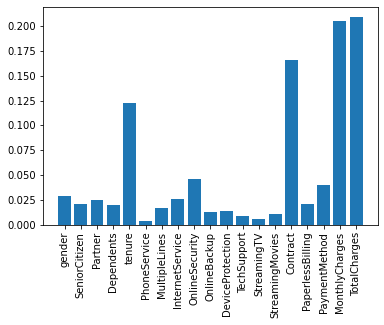

In [21]:
for i in range(len(dt.feature_importances_)):
    print(f'Feature {X.columns[i], dt.feature_importances_[i]}')
# plot the scores
plt.bar([i for i in range(len(dt.feature_importances_))], dt.feature_importances_)

plt.xticks(range(0,len(X.columns)), X.columns, rotation = 'vertical')

plt.show()

## Feature Importance by RF classifier

Feature ('gender', 0.02674840295802202)
Feature ('SeniorCitizen', 0.020839589554120345)
Feature ('Partner', 0.023335844733336785)
Feature ('Dependents', 0.01992089416333018)
Feature ('tenure', 0.1558616115820151)
Feature ('PhoneService', 0.00513321355950409)
Feature ('MultipleLines', 0.024136938470692718)
Feature ('InternetService', 0.026256543591063945)
Feature ('OnlineSecurity', 0.04596979705587852)
Feature ('OnlineBackup', 0.03040016990337879)
Feature ('DeviceProtection', 0.022462278890317988)
Feature ('TechSupport', 0.037584018377178605)
Feature ('StreamingTV', 0.017730965301889123)
Feature ('StreamingMovies', 0.017880259420959145)
Feature ('Contract', 0.07894291479990789)
Feature ('PaperlessBilling', 0.026167495356490093)
Feature ('PaymentMethod', 0.052081516390799894)
Feature ('MonthlyCharges', 0.1753863219597919)
Feature ('TotalCharges', 0.1931612239313226)


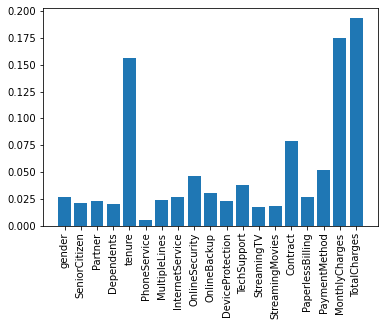

In [22]:
for i in range(len(rf.feature_importances_)):
    print(f'Feature {X.columns[i], rf.feature_importances_[i]}')
# plot the scores
plt.bar([i for i in range(len(rf.feature_importances_))], rf.feature_importances_)

plt.xticks(range(0,len(X.columns)), X.columns, rotation = 'vertical')

plt.show()

## Feature importance by GB classifier

Feature ('gender', 0.0005513497405730983)
Feature ('SeniorCitizen', 0.006924068758738955)
Feature ('Partner', 0.0011523787736140393)
Feature ('Dependents', 0.0009534931854592793)
Feature ('tenure', 0.15692367609499272)
Feature ('PhoneService', 0.0011112776484650986)
Feature ('MultipleLines', 0.01036159935841273)
Feature ('InternetService', 0.012478963235930585)
Feature ('OnlineSecurity', 0.0839142845312742)
Feature ('OnlineBackup', 0.010413113598542603)
Feature ('DeviceProtection', 0.002481361692568075)
Feature ('TechSupport', 0.04096139048856123)
Feature ('StreamingTV', 0.0002558119714579323)
Feature ('StreamingMovies', 0.006842144037550687)
Feature ('Contract', 0.4128607457969569)
Feature ('PaperlessBilling', 0.014373149859757722)
Feature ('PaymentMethod', 0.019198832875981297)
Feature ('MonthlyCharges', 0.13219908205643063)
Feature ('TotalCharges', 0.08604327629473214)


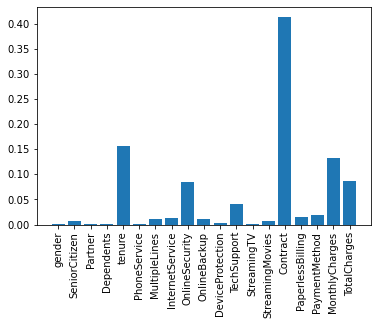

In [23]:
for i in range(len(gb.feature_importances_)):
    print(f'Feature {X.columns[i], gb.feature_importances_[i]}')
# plot the scores
plt.bar([i for i in range(len(gb.feature_importances_))], gb.feature_importances_)

plt.xticks(range(0,len(X.columns)), X.columns, rotation = 'vertical')

plt.show()

## Observations

It is observed that almost all three classifiers gave the following as the important features.

1. Contract
2. Tenure
3. Online Security
4. Tech Support
5. Monthly & Total Charges.

This shows that the categorical features are not adding much value and therefore can be excluded.


## Feature Selection for Categorical Features Using Statistical Methods

### Dropping Not needed  Features

In [191]:
df_test.drop(['customerID','Index'], axis = 1, inplace = True)

### Numerical feature corelation heatmap

Only Tenure and Total charges is seen to have some correlation, however we are going to keep both features for time being

<AxesSubplot:>

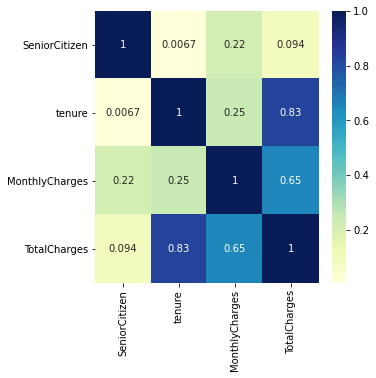

In [214]:
correlation = df.iloc[:, :-1].corr()
top_features = correlation.index
plt.figure(figsize = (5,5))
sns.heatmap(df[top_features].corr(), annot = True, cmap="YlGnBu")

In [ ]:
x = df.drop(['Index','customerID'], axis = 1) #Dropping the not needed features

In [7]:
df = impute_data(df)

## Checking Class Imbalance


### It is seen that data is imbalanced as class 0 is the majority class

In [40]:
percentage = round((df.Churn.value_counts()/4930)*100, 2)

In [41]:
percentage

0    73.73
1    26.27
Name: Churn, dtype: float64

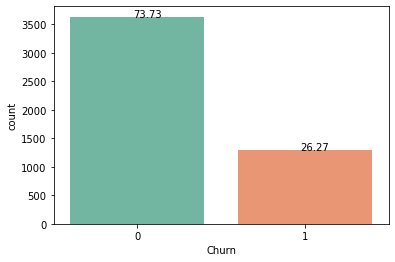

In [42]:
#plt.figure(figsize=(4, 3))
plot = sns.countplot('Churn', data = df, palette="Set2",
             )
percentage = round((df.Churn.value_counts()/4930)*100, 2)

for p, label in zip(plot.patches, percentage):
    plot.annotate(label, (p.get_x()+0.375, p.get_height()+0.5))

# Univariate Analysis Using Domain knowledge

## Churn Vs Tenure

### The following boxplot shows that customers who spend more time with the company are less likely to churn.
### The tenure of people who churn is between 3 to 30, which means that new customers are churning indicating a recent issue in the company services

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

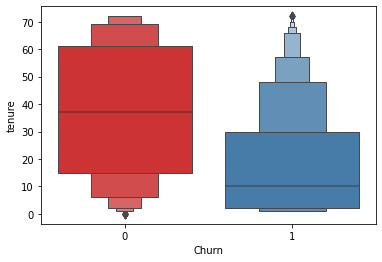

In [47]:
sns.boxenplot(x = 'Churn', y = 'tenure', data  = df, palette="Set1")

## Churn vs Monthly Charges

### This plot indicates that the customers who are churning have monthly charges of more than 60, indicating the need for some discount packages or ways to reduce the monthly bills.

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

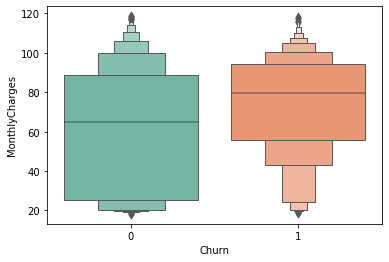

In [49]:
sns.boxenplot(x = 'Churn', y = 'MonthlyCharges', data  = df,palette="Set2" )

## Churn Vs Total Charges

### Here it is seen that the target variable is also impacted by customers who are having total bills greater than 6000. Although there are customers with less total charges who have churned.

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

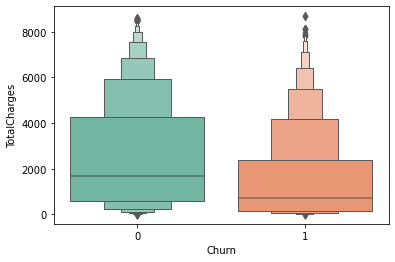

In [54]:
sns.boxenplot(x = 'Churn', y = 'TotalCharges', data  = df,palette="Set2" )

## Churn vs Senior Citizen

### The proportion of senior citizens is higher in the churned customers. 
### This indicates that senior citizens should be targeted in a specific way as they might not be well versed with the technology or customer support should be more polite and helpful while dealing with them.

<AxesSubplot:xlabel='Churn', ylabel='count'>

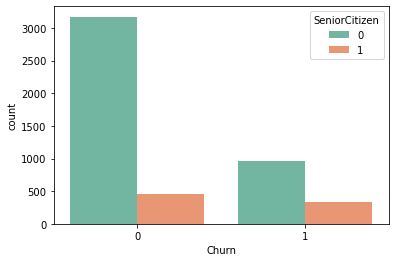

In [55]:
sns.countplot(x = 'Churn', hue = 'SeniorCitizen', data = df,  palette="Set2")

## Churn Vs Gender

### It appears that gender plays no specific role in the target variable as the distribution for male and female customers is the same whether the customers churned or not. ( Chi Sqaure and mutual information feature selection predicted the same for this feature.

<AxesSubplot:xlabel='Churn', ylabel='count'>

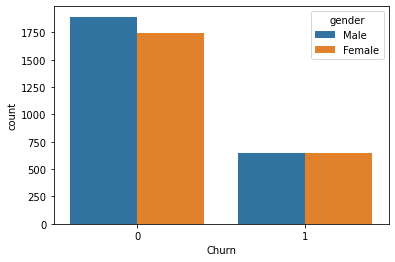

In [17]:
sns.countplot(x = 'Churn', hue = 'gender', data = df)

## Churn Vs Partner

### This plot shows that more customers are churning if they are not having a partner.

<AxesSubplot:xlabel='Churn', ylabel='count'>

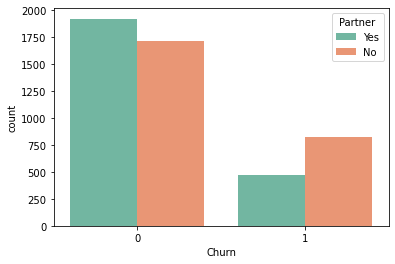

In [56]:
sns.countplot(x = 'Churn', hue = 'Partner', data = df,palette="Set2" ) 

## Technical Support Vs Churn

### It is quite obvious that customers not opting for technical support have churned, shows that in case of running into any issue, either it was not resolved or it took a lot of time for resolution.

<AxesSubplot:xlabel='Churn', ylabel='count'>

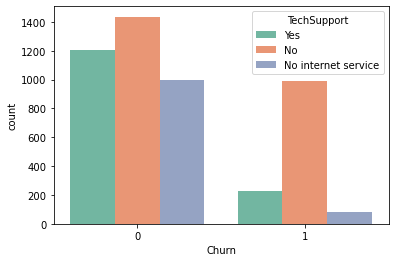

In [57]:
sns.countplot(x = 'Churn', hue = 'TechSupport', data = df, palette="Set2" ) 

## Churn Vs Contract Type

### Customers having monthly contract have the highest percentage of leaving the company services. Monthly contracts have less obligations.

<AxesSubplot:xlabel='Churn', ylabel='count'>

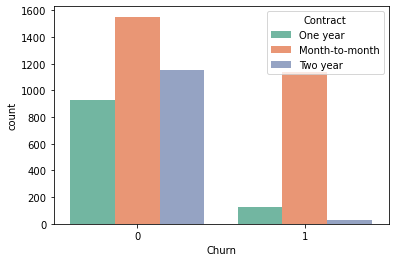

In [58]:
sns.countplot(x = 'Churn', hue = 'Contract', data = df, palette="Set2" )    

## Churn Vs Internet Service

### This analysis appears to show some issue with the fiber optical service of the company. As subscribers having churned were mostly using the fiber optic medium. 

<AxesSubplot:xlabel='Churn', ylabel='count'>

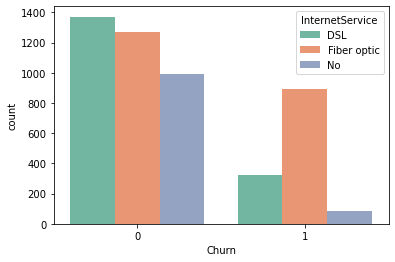

In [59]:
sns.countplot(x = 'Churn', hue = 'InternetService', data = df, palette="Set2" )    

## Churn Vs Payment Method

### Electronic check seems to be the problem here for the customers. The company should be reaching out to the customers and offering other means of payments.

<AxesSubplot:xlabel='Churn', ylabel='count'>

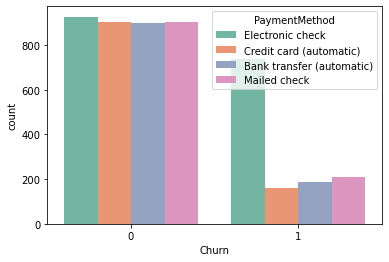

In [60]:
sns.countplot(x = 'Churn', hue = 'PaymentMethod', data = df, palette="Set2" )  

## Churn Vs Online Security

### The percentage of subscribers not opting for online security is almost the same in both classes. However the subscribers who churned have less proportion of internet and online security facility.

<AxesSubplot:xlabel='Churn', ylabel='count'>

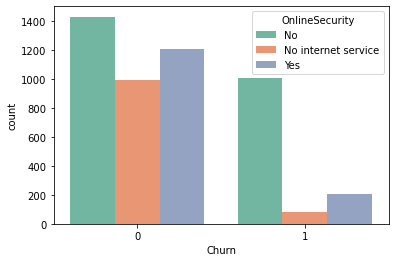

In [61]:
sns.countplot(x = 'Churn', hue = 'OnlineSecurity', data = df, palette="Set2" )  

# ANOVA F (analysis of variance) test to find feature importance in numerical Features

In [ ]:
df1 = df # Copying Dataframe

### Dropping categorical features

In [ ]:
df1.drop(['gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 
       'PaperlessBilling', 'PaymentMethod', 
       'Churn'], axis = 1, inplace = True)

In [ ]:
df1.drop(['Contract', 'Index', 'customerID' ], axis = 1, inplace = True)

In [ ]:
df1.head()

In [ ]:
numerical = SelectKBest(score_func=f_classif, k=3)
numerical.fit(df1, y)
numerical_f = numerical.transform(df1)

In [ ]:
for i in range(len(numerical.scores_)):
    print(f'Feature {df1.columns[i], numerical.scores_[i]}')
# plot the scores
plt.bar([i for i in range(len(numerical.scores_))], numerical.scores_)

plt.xticks(range(0,len(df1.columns)), df1.columns, rotation = 'vertical')

plt.show()

# Bivariate Analysis for Numerical Features

## Total charges Vs Tenure

### The two classes over lap and there is no linear seperation between them. The features need a transformation to get some information out of them

In [ ]:
df.drop(['Index', 'customerID'], axis = 1, inplace = True)

In [ ]:
df

In [ ]:
df2 = pd.DataFrame()

In [ ]:
df2[['MonthlyCharges','TotalCharges','Churn', 'tenure']] = df[['MonthlyCharges','TotalCharges', 'Churn', 'tenure']] 

<AxesSubplot:xlabel='tenure', ylabel='TotalCharges'>

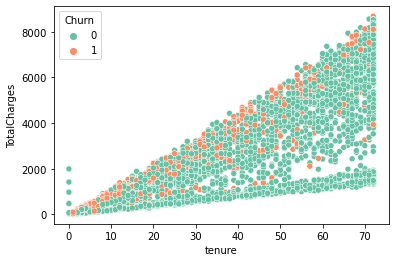

In [62]:
sns.scatterplot(y='TotalCharges', x = 'tenure', hue =  'Churn', data  = df, palette="Set2" )

## Total charges vs Monthly charges

### Here again we see an overlap betweent the classes however as with box plot analysis previously, we see that higher monthly charges lead to greater probability of churn.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='TotalCharges'>

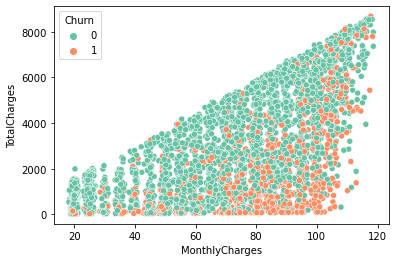

In [63]:
sns.scatterplot(x='MonthlyCharges', y = 'TotalCharges', hue =  'Churn', data  = df, palette="Set2"  )

## Monthly Charges Vs Tenure

### There is some indication that higher monthly charges and lower tenure increase the chances of churn.

<AxesSubplot:xlabel='MonthlyCharges', ylabel='tenure'>

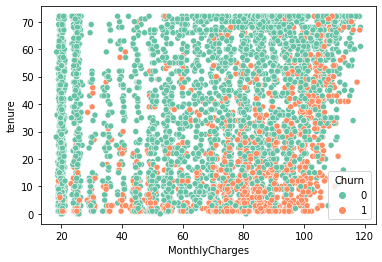

In [64]:
sns.scatterplot(x='MonthlyCharges', y = 'tenure', hue =  'Churn', data  = df, palette="Set2" )


## Observations

The univariate analysis was done based on domain knowledge, addition check was made was chi square method to check for feature importance.

It is observed that univariate analysis seems to match with the Chi square output, hence the important features will kept others will be discarded.

There are only 3 numerical features, out of which tenure seems to be the one with highest importance.

## Distributions of Numerical Features

### None of the distribution is normal. 
### The feature 'TotalCharges' is right skewed, while other features are not following any distribution

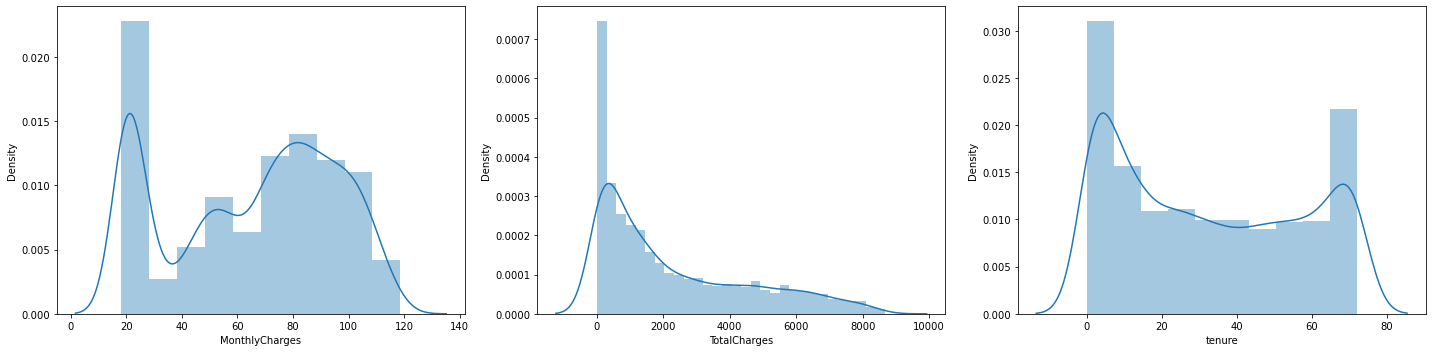

In [30]:
fig, ax = plt.subplots(ncols = 3, figsize = (20,5))
sns.distplot(df['MonthlyCharges'], bins = 10, ax = ax[0], kde = True)
sns.distplot(df['TotalCharges'], bins = 30, ax = ax[1], kde = True)
sns.distplot(df['tenure'], bins = 10, ax = ax[2], kde = True)
plt.tight_layout()

## Help has been sought from the official seaborn distribution to get different type of plots.

## Multivariate Analysis for Categorical Features

## Converting Binary Cat Variables to 0 and 1

In [67]:
df['Partner'] = np.where(df['Partner'] == 'No', 0,1)
df['gender'] = np.where(df['gender'] == 'Male', 1,0)
df['Dependents'] = np.where(df['Dependents'] == 'Yes', 1,0)
df['PhoneService'] = np.where(df['PhoneService'] == 'Yes', 1,0)
df['PaperlessBilling'] = np.where(df['PaperlessBilling'] == 'Yes', 1,0)

### Partner Vs Dependents

It is seen that the customer is less likely to churn if he/she has a partner and got dependents

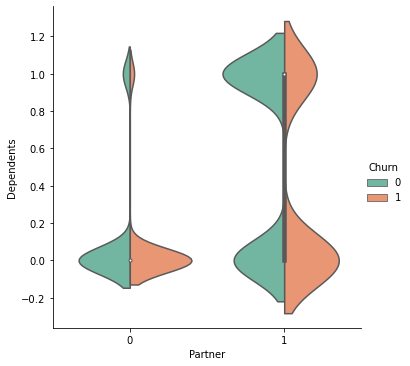

In [68]:
sns.catplot(x = 'Partner', y = 'Dependents', data  = df, hue = 'Churn', kind = 'violin', split = True, palette="Set2"  )

### Senior Citizen Vs Online Security

There is not much information in this combination


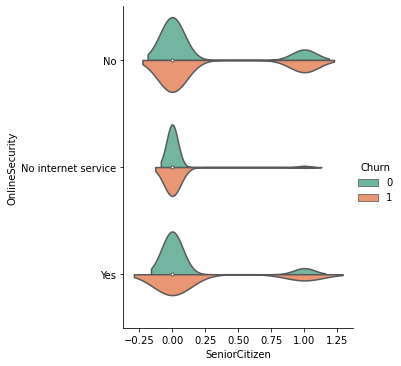

In [69]:
sns.catplot(x = 'SeniorCitizen', y = 'OnlineSecurity', data  = df, hue = 'Churn', kind = 'violin', split = True, palette="Set2" )

###  PaperlessBilling Vs Online Security

Customers using paperless billing are more likely to churn whether or not they are using online security.


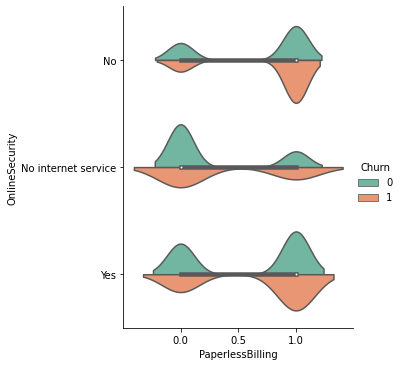

In [70]:
sns.catplot(x = 'PaperlessBilling', y = 'OnlineSecurity', data  = df, hue = 'Churn', kind = 'violin', split = True, palette="Set2" )

###  PhoneService Vs Online StreamingMovies

Not much information in this combination


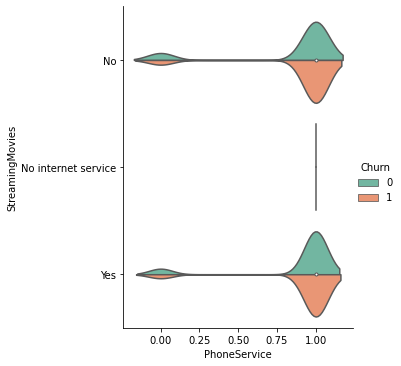

In [71]:
sns.catplot(x = 'PhoneService', y = 'StreamingMovies', data  = df, hue = 'Churn', kind = 'violin', split = True, palette="Set2" )

### PhoneService Vs Online StreamingTV

Not much information in this combination



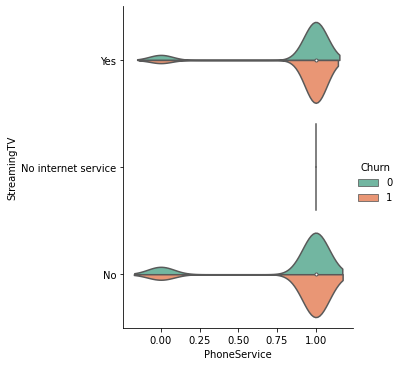

In [72]:
sns.catplot(x = 'PhoneService', y = 'StreamingTV', data  = df, hue = 'Churn', kind = 'violin', split = True, palette="Set2" )

### PhoneService Vs  PaymentMethod

Not much information in this combination


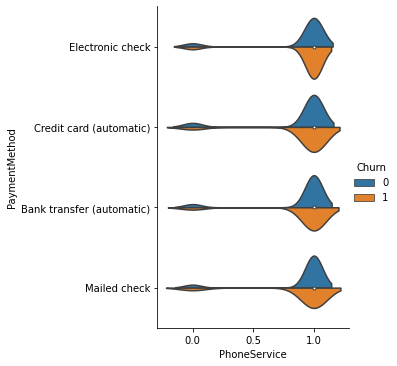

In [37]:
sns.catplot(x = 'PhoneService', y = 'PaymentMethod', data  = df, hue = 'Churn', kind = 'violin', split = True)

### Gender Vs  Total and Monthly Charges

Not much information in this combination

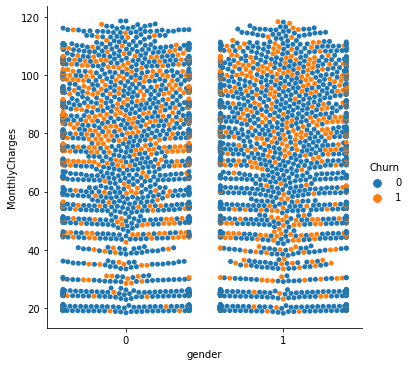

In [38]:
sns.catplot(y='MonthlyCharges', x = 'gender', hue =  'Churn', data  = df, kind = 'swarm')

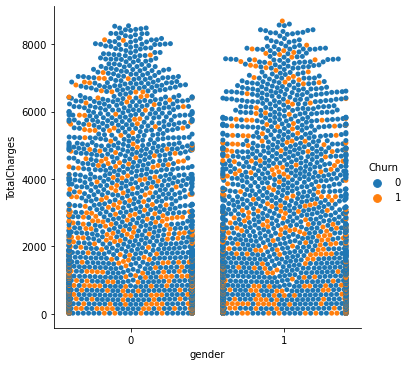

In [39]:
sns.catplot(y='TotalCharges', x = 'gender', hue =  'Churn', data  = df, kind = 'swarm')

## Churn is more in case partner is not present 

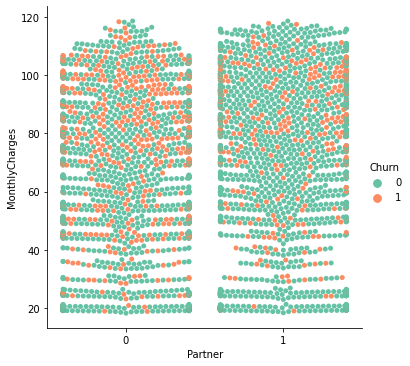

In [73]:
sns.catplot(y='MonthlyCharges', x = 'Partner', hue =  'Churn', data  = df, kind = 'swarm', palette="Set2" )

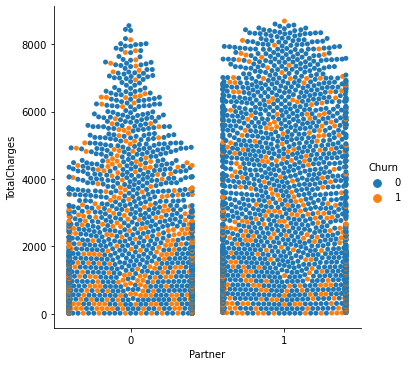

In [43]:
sns.catplot(y='TotalCharges', x = 'Partner', hue =  'Churn', data  = df, kind = 'swarm')

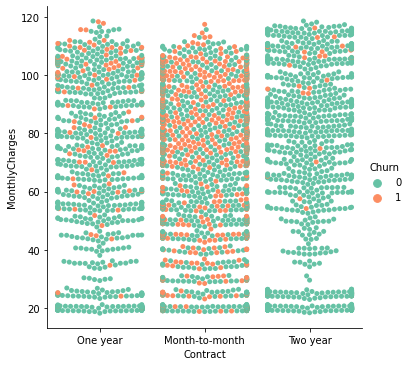

In [74]:
sns.catplot(y='MonthlyCharges', x = 'Contract', hue =  'Churn', data  = df, kind = 'swarm', palette="Set2" )

## Churn is seen to be more in case of Monthly contract regardless of the monthly charges

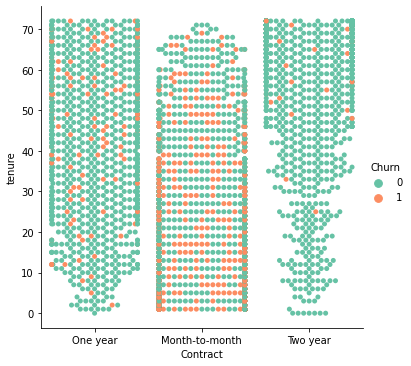

In [75]:
sns.catplot(y='tenure', x = 'Contract', hue =  'Churn', data  = df, kind = 'swarm', palette="Set2" )

#### Monthly contract again seems to be the issue regardless of the tenure

# Key Takeaways

1. The detailed EDA has reveal many important insights into the provided data. Uni variate and Bi variate analysis has been performed. Categorical - categorical, Numerical - Numerical and Categorical - Numerical analysis is done get the maximum information from the given dataset.
2. Numerical features like Tenure, Total charges and Monthly charges appear to be the most important.
3. In categorical features, Contract, Technical support, Online security and payment method seem to play an important role in deciding whether the customer will churn or not.
4. For finding feature importance statistical methods like Chi square, Mutual information and annova have been used along with the ML models like DT, RF and GB. These features have inbuilt method to give out the feature importance.
5. While using statistical methods analysis had to be done seperately on numerical and categorical features.
6. In feature engineering, a new feature was created out of the total charges feature. It was divided into 5 different ranges. And the subcribers have been divided into these 5 groups.
7. The new feature gave further insights like which amount of bill is causing more churn in the subscribers.

In [2]:
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [40]:
df.drop(['customerID', 'Index'], axis = 1, inplace = True )
#df_test.drop(['customerID'], axis = 1, inplace = True )

In [ ]:
#df_test.drop(['Index','customerID'], axis = 1, inplace = True )

In [41]:
X_new = df.drop('Churn', axis = 1)
y_new = df['Churn']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.1,stratify=y_new, random_state=100 )

In [43]:
print(f' train shape {X_train.shape}, test shape {X_test.shape}')

 train shape (4437, 19), test shape (493, 19)


In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [44]:
X_train.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

### Using 11 different categorical encoders to check which one gives best results

In [45]:
encoder_list = [ce.backward_difference.BackwardDifferenceEncoder, 
               ce.basen.BaseNEncoder,
               ce.binary.BinaryEncoder,
                ce.cat_boost.CatBoostEncoder,
                ce.helmert.HelmertEncoder,
                ce.james_stein.JamesSteinEncoder,
                ce.one_hot.OneHotEncoder,
                ce.leave_one_out.LeaveOneOutEncoder,
                ce.m_estimate.MEstimateEncoder,
                ce.ordinal.OrdinalEncoder,
                ce.polynomial.PolynomialEncoder,
                ce.sum_coding.SumEncoder,
                ce.target_encoder.TargetEncoder,
                ce.woe.WOEEncoder
                ]

## Creating the required functions

In [46]:
def impute_data(x):
    x = x.replace(r'^\s+$', np.nan, regex=True) # Converting Blank to nan
    x["TotalCharges"] = pd.to_numeric(x["TotalCharges"]) # changing dtype from string to float64
    x.TotalCharges.fillna(method = 'backfill', inplace = True) # filling the one nan value
    return x
    

In [47]:
def encoder_scalar_test(encoder, method, req_cols ,cols_not_required, num_cols, x_train,y_train, x_test):
    
    ''' This function encodes the categorical features and scales the numerical features for Test Set'''
  
    encoding = encoder(cols = req_cols).fit(x_train, y_train) # Fitting on Train
    encoding_output = encoding.transform(x_test) # Transforming on test
    if len(req_cols) < 6:
        encoding_output.drop(cols_not_required, axis = 1 , inplace = True)

    else:
        encoding_output.drop(num_cols, axis = 1 , inplace = True)
    
    num_features = x_train[num_cols]
    num_features_test = x_test[num_cols]
    scaling = method.fit(num_features) # Fitting on train
    scaling = method.transform(num_features_test) # transformaing on test data
    
    num_features_test.loc[:,:] = scaling
    df_Preprocessed =  pd.concat([num_features_test,encoding_output], axis = 1)
    
    return df_Preprocessed

In [48]:
def encoder_scalar(encoder, method, req_cols ,cols_not_required, num_cols, x,y):
    
    ''' This function encodes the categorical features and scales the numerical features'''
  
    encoding = encoder(cols = req_cols)
    encoding.fit(x,y)
    filename_cat = 'cat_enc.sav'
    pickle.dump(encoding, open(filename_cat, 'wb'))
    
    encoding_output = encoding.transform(x)
    if len(req_cols) < 6:
        encoding_output.drop(cols_not_required, axis = 1 , inplace = True)

    else:
        encoding_output.drop(num_cols, axis = 1 , inplace = True)
    
    num_features = x[num_cols]
    
    scaling = method.fit(num_features)
    filename_num = str(method) + '.sav'
    pickle.dump(scaling, open(filename_num, 'wb'))
    
    scaling = method.transform(num_features)
    num_features.loc[:,:] = scaling
    df_Preprocessed =  pd.concat([num_features,encoding_output], axis = 1)
    
    return df_Preprocessed

In [49]:
def cross_val(search_type, encoding_type, y, model):
    
    ''' This functions uses cross validation to do hyper parameter tuning'''
    
    Cv = RepeatedStratifiedKFold(n_splits = 3, n_repeats=5, random_state=1)
    random_search = search_type(estimator = model,n_iter=5, param_distributions = grid, scoring = 'f1_macro', n_jobs = -1, cv = Cv, verbose = 2 )
    random_search.fit(encoding_type, y)
          
    best_est = random_search.best_estimator_

    return best_est
        
        
        

In [50]:
def ploting(score, CoderName):
    
    ''' This Function plots the Categorical coder name along with the score'''
    
    plt.figure(figsize = (7,7))
    y_pos = np.arange(len(score))
    plt.barh(y_pos, score)
    plt.yticks(y_pos,CoderName, rotation = 'horizontal')
    for i, v in enumerate(score):
        plt.text(v, i, str(v))

plt.show()    

In [102]:
def output_score(hyperparameters, encoded_features, y, model):
    
    ''' This function calculates the CV score'''
    score = []
    for i in tqdm(range(len(hyperparameters))):
      
        model = hyperparameters[i]
        
        cross_val = cross_val_score(model, encoded_features[i], y, cv=3, scoring = 'f1_macro')
        score.append(round(mean(cross_val), 4))
            

    dictionary = dict(zip(labels, score))
    sorted_dict = dict(sorted(dictionary.items(), key=lambda x:x[1], reverse = True))
    Coder_name = sorted_dict.keys()
    score_value = sorted_dict.values()
    
    return Coder_name, score_value
    

In [182]:
def conf_matrix(model, x_train, x_test, y_train, y_test):
    
    ''' This function uses test data to create the confusion matrix'''
    #NN = Sequential()
    predict_y = model
    predict_y.fit(x_train, y_train)
    ###if (model == NN):
        
       # y_pred = predict_y.predict(x_test)
        #y_pred = (y_pred > 0.5)
        
    #else:
        
    y_pred = predict_y.predict(x_test)
   
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt ='d', cmap = 'Blues')
    plt.xlabel('Actual Labels')
    plt.ylabel('Predicted Labels')
    #plt.show()
    
    Recall = round(recall_score(y_test, y_pred), 3)
    Precision = round(precision_score(y_test, y_pred),3)
    roc_auc = round(roc_auc_score(y_test, y_pred), 3)
    F1_score = round(f1_score(y_test, y_pred, average = 'macro'),3)
    Accuracy = round(accuracy_score(y_test, y_pred),3)
    tn, fp, fn, tp = cm.ravel()
    
    
    plt.title(f'{model}\n\n')
    
    print(f' The Recall is: {Recall}\n\n The Precision is: {Precision}\n\n the ROC AUC is {roc_auc}\n\n The F1 score is {F1_score}\n\n And the accuracy is {Accuracy}')
    print(f' TN: {tn}\n\n FP: {fp}\n\n FN: {fn}\n\n, TP: {tp}\n\n')

In [53]:
def feature_engg(x):
    
    conditions = [(x['TotalCharges'] <=500), 
              (x['TotalCharges'] >500) & (x['TotalCharges'] <=1500),
              (x['TotalCharges'] >1500) & (x['TotalCharges'] <=3500),
              (x['TotalCharges'] >3500) & (x['TotalCharges'] <=5000),
              (x['TotalCharges'] > 5000)]
    ranges  =  ['0 - 500', '500 - 1500', '1500 - 3500','3500 - 5000', ' > 5000'] 
    x['Bill_cat'] =  np.select(conditions, ranges) # appending the new feature to the dataframe
    ranges_final = x.Bill_cat.value_counts()
    ranges_final.plot.bar() 
    return x
    

### Creating lists to seperate the important features from other features

In [205]:
cols_set1=['Index','gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']#, 'Bill_cat']
extra_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineBackup', 'DeviceProtection', 'StreamingTV',
       'StreamingMovies', 'PaperlessBilling', 'Bill_cat', 'tenure','MonthlyCharges', 'TotalCharges']

cols_num = ['tenure','MonthlyCharges', 'TotalCharges']

cols_set2 = ['Contract', 'TechSupport', 'OnlineSecurity','PaymentMethod' ]

### Encoding all features using all encoders

In [55]:
df = impute_data(df)

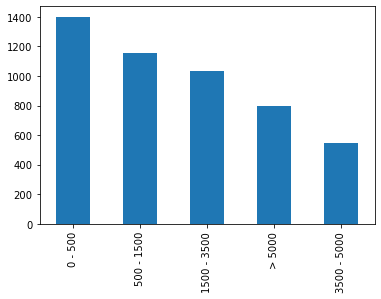

In [30]:
df = feature_engg(df)

In [56]:
X_train = impute_data(X_train)
#X_train = feature_engg(X_train)

In [57]:
X_test = impute_data(X_test)
#X_test = feature_engg(X_test)

In [ ]:
df_test = impute_data(df_test)
df_test = feature_engg(df_test)

In [ ]:
X_train.columns

In [ ]:
import joblib
import pickle

In [ ]:
#encoder_scalar(enco,StandardScaler(), cols_set1, extra_cols,cols_num, X_train, y_train)
encoding = ce.backward_difference.BackwardDifferenceEncoder(cols = cols_set1).fit(X_train)
#X_train.drop(cols_num, axis = 1 , inplace = True)
#encoding.fit(X_train,y_train)
filename_cat = 'cat_enc_new.sav'
#pickle.dump(encoding, open(filename_cat, 'wb'))
joblib.dump(encoding, filename_cat)

In [ ]:
num_features = X_train[cols_num]
    
scaling = StandardScaler().fit(num_features)
filename_num = 'Numerical.sav'
pickle.dump(scaling, open(filename_num, 'wb'))

In [58]:
Coders_all_features = []

for enco in encoder_list:
    Coders_all_features.append(encoder_scalar(enco,StandardScaler(), cols_set1, extra_cols,cols_num, X_train, y_train))

#Coders_all_features = dict(zip())
    

## Using KNN as baseline Model

1. Defining hyper parameters ranges for tuning.

In [59]:
model = KNeighborsClassifier()
n_neighbors = range(1,100,1)
weights = ['uniform', 'distance']
algorithm = ['ball_tree', 'kd_tree', 'brute']
metric =  ['euclidean', 'manhattan', 'minkowski']
grid = dict(n_neighbors = n_neighbors, weights = weights, algorithm = algorithm, metric = metric )

### Hyper parameters when all features are used

In [60]:
Paramters_all_features = []

for i in range(len(Coders_all_features)):
    

    Paramters_all_features.append(cross_val(RandomizedSearchCV,Coders_all_features[i], y_train, KNeighborsClassifier()))

Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    0.6s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.4s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.5s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.8s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.3s finished


In [ ]:
Coders_selected_features_test

Paramters_all_features_test = []

for i in range(len(Coders_selected_features_test)):
    

    Paramters_all_features_test.append(cross_val(RandomizedSearchCV,Coders_selected_features_test[i], y_test, KNeighborsClassifier()))

In [61]:
Paramters_all_features

[KNeighborsClassifier(algorithm='brute', metric='euclidean', n_neighbors=49),
 KNeighborsClassifier(algorithm='kd_tree', n_neighbors=68),
 KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=47),
 KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=37,
                      weights='distance'),
 KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=72),
 KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=32,
                      weights='distance'),
 KNeighborsClassifier(algorithm='kd_tree', metric='euclidean', n_neighbors=25),
 KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=41),
 KNeighborsClassifier(algorithm='ball_tree', n_neighbors=36, weights='distance'),
 KNeighborsClassifier(algorithm='ball_tree', metric='manhattan', n_neighbors=97),
 KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=70),
 KNeighborsClassifier(algorithm='ball_tree', metric='m

### Getting validation score using CV using Hyper parameters

In [62]:
labels = ['BackwardDifferenceEncoder', 
               'BaseNEncoder',
               'BinaryEncoder',
                'CatBoostEncoder',
                'HelmertEncoder',
                'JamesSteinEncoder',
                'OneHotEncoder',
                'LeaveOneOutEncoder',
                'MEstimateEncoder',
                'OrdinalEncoder',
                'PolynomialEncoder',
                'SumEncoder',
                'TargetEncoder',
                'WOEEncoder']

In [103]:
encodername_all, scorevalue_all = output_score(Paramters_all_features, Coders_all_features, y_train, KNeighborsClassifier())

100%|██████████| 14/14 [00:04<00:00,  3.35it/s]


## Plotting the mean score by using different encoders

1. It is seen the One Hot and One Hot encoder Encoder gives the best results, however since LOOE has less dimensions, it will be used.

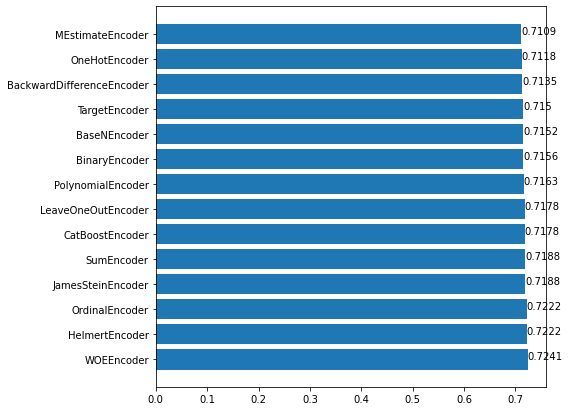

In [104]:
ploting(scorevalue_all,encodername_all )

## Encoding only the important features

In [ ]:
Coders_selected_features = []



for enco in encoder_list:
    Coders_selected_features.append(encoder_scalar(enco,StandardScaler(), cols_set2, extra_cols,cols_num, X_train, y_train))
   
    

In [ ]:
Paramters_selected_features = []

for i in range(len(Coders_selected_features)):
    

    Paramters_selected_features.append(cross_val(RandomizedSearchCV,Coders_selected_features[i], y_train, KNeighborsClassifier()))

In [ ]:
Paramters_selected_features

## Plotting the mean score by using different encoders

1. It is seen the Leave One out Encoder gives the best results, so this will be used in this case study.
2. Using only the important features instead of all the features has given slightly better results.

In [ ]:
encodername, scorevalue = output_score(Paramters_selected_features, Coders_selected_features, y_train, KNeighborsClassifier())

In [ ]:
ploting(scorevalue,encodername )

## Encoding Validation set

In [149]:
Coders_all_features_test = []

for enco in encoder_list:
    Coders_all_features_test.append(encoder_scalar_test(enco,StandardScaler(), cols_set1, extra_cols,cols_num, X_train, y_train, X_test))
   

In [194]:
Coders_all_features_testset = []

for enco in encoder_list:
    Coders_all_features_testset.append(encoder_scalar_test(enco,StandardScaler(), cols_set1, extra_cols,cols_num, X_train, y_train, df_test))
   

In [193]:
df_test = impute_data(df_test)

In [ ]:
Coders_selected_testset = []

for enco in encoder_list:
    Coders_selected_testset.append(encoder_scalar_test(enco,StandardScaler(), cols_set2, extra_cols,cols_num, X_train, y_train, df_test))
   

In [ ]:
Coders_selected_features_test = []

for enco in encoder_list:
    Coders_selected_features_test.append(encoder_scalar_test(enco,StandardScaler(), cols_set2, extra_cols,cols_num, X_train, y_train, X_test))
   

In [ ]:
params={'classifier': 'KNN', 'n_neighbors': 56, 'weights': 'distance', 'algoirthm': 'kd_tree', 'metric': 'manhattan'},

 The Recall is: 0.496

 The Precision is: 0.667

 the ROC AUC is 0.704

 The F1 score is 0.721

 And the accuracy is 0.803
 TN: 332

 FP: 32

 FN: 65

, TP: 64




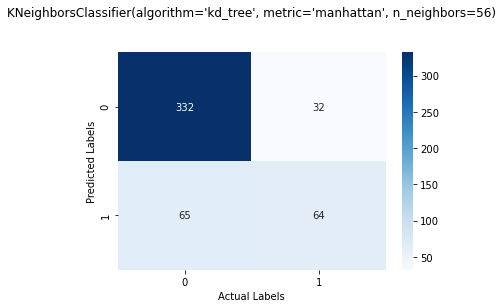

In [183]:
conf_matrix(KNeighborsClassifier(weights = 'uniform', algorithm='kd_tree', metric='manhattan', n_neighbors=56),Coders_all_features[13], Coders_all_features_test[13],y_train, y_test )

 The Recall is: 0.5271317829457365

 The Precision is: 0.68

 the ROC AUC is 0.7196098475168242

 The F1 score is 0.7355165471609952

 And the accuracy is 0.8113590263691683
 TN: 332

 FP: 32

 FN: 61

, TP: 68




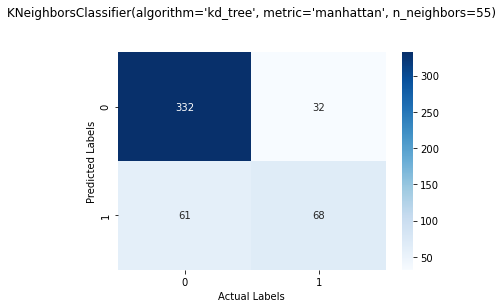

In [167]:
conf_matrix(KNeighborsClassifier(weights = 'uniform', algorithm='kd_tree', metric='manhattan', n_neighbors=55),Coders_all_features[13], Coders_all_features_test[13],y_train, y_test )

 The Recall is: 0.37209302325581395

 The Precision is: 0.7058823529411765

 the ROC AUC is 0.6585739841553795

 The F1 score is 0.6796497526265337

 And the accuracy is 0.795131845841785
 TN: 344

 FP: 20

 FN: 81

, TP: 48




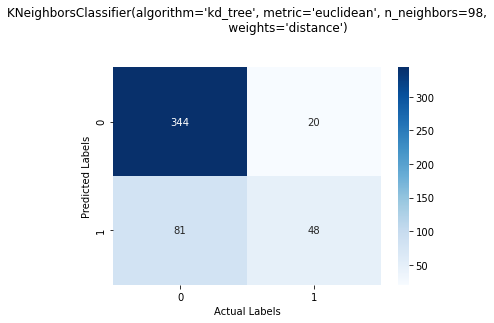

In [153]:
conf_matrix(KNeighborsClassifier(weights = 'distance', algorithm='kd_tree', metric='euclidean', n_neighbors=98),Coders_all_features[12], Coders_all_features_test[13],y_train, y_test )

 The Recall is: 0.4186046511627907

 The Precision is: 0.4153846153846154

 the ROC AUC is 0.6049067211857909

 The F1 score is 0.6046427642025992

 And the accuracy is 0.6937119675456389
 TN: 288

 FP: 76

 FN: 75

, TP: 54




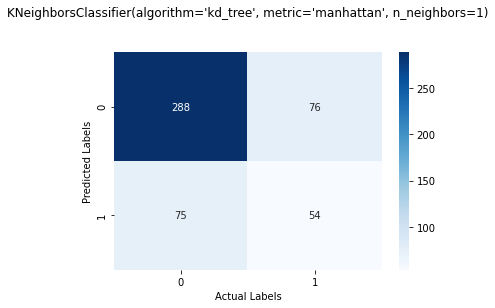

In [154]:
conf_matrix(KNeighborsClassifier(algorithm='kd_tree', metric='manhattan', n_neighbors=1),Coders_all_features[13], Coders_all_features_test[13],y_train, y_test )

## Logistic Regression

In [ ]:
c = Coders_all_features[0]

In [ ]:
c.columns

In [ ]:
Coders_all_features[0]

In [ ]:
model = LogisticRegression(C=1000, solver='newton-cg')
model.fit(Coders_all_features[0], y_train)
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(Coders_all_features_test[0], y_test)
print(result)

In [65]:
model = LogisticRegression()
solvers = ['newton-cg',  'liblinear', 'saga']
penalty = ['l1', 'l2']
c_values = [1000, 100, 10, 1.0, 0.1, 0.01]
grid = dict(solver=solvers,penalty=penalty,C=c_values)


### Using All features

In [66]:
Paramters_all_features_LR = []

for i in range(len(Coders_all_features)):
    

    Paramters_all_features_LR.append(cross_val(RandomizedSearchCV,Coders_all_features[i], y_train, LogisticRegression()))
    

Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.6s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    3.1s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.5s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.0s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.8s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.1s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.3s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    2.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.5s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    0.8s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.1s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    0.7s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.7s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.1s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    0.5s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.6s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.4s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    1.4s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.6s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    0.4s finished


In [67]:
Paramters_all_features_LR

[LogisticRegression(C=100, penalty='l1', solver='liblinear'),
 LogisticRegression(C=100, solver='newton-cg'),
 LogisticRegression(C=100, solver='newton-cg'),
 LogisticRegression(C=1000, penalty='l1', solver='liblinear'),
 LogisticRegression(C=10, solver='liblinear'),
 LogisticRegression(C=1000, penalty='l1', solver='liblinear'),
 LogisticRegression(C=100, penalty='l1', solver='saga'),
 LogisticRegression(C=100, solver='newton-cg'),
 LogisticRegression(C=1000, penalty='l1', solver='liblinear'),
 LogisticRegression(C=1000, solver='saga'),
 LogisticRegression(C=100, solver='newton-cg'),
 LogisticRegression(C=1000, penalty='l1', solver='liblinear'),
 LogisticRegression(C=10, solver='saga'),
 LogisticRegression(C=100, solver='saga')]

In [105]:
encodername_all_lr, scorevalue_all_lr = output_score(Paramters_all_features_LR, Coders_all_features, y_train, LogisticRegression())

100%|██████████| 14/14 [00:09<00:00,  1.52it/s]


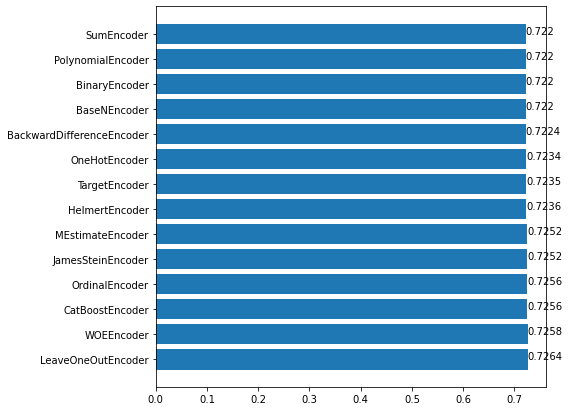

In [106]:
ploting(scorevalue_all_lr,encodername_all_lr )

## It appears that One Hot Encoder can be used as it is one of the best

## Using Selected features

In [ ]:
Paramters_selected_features_lr = []

for i in range(len(Coders_selected_features)):
    

    Paramters_selected_features_lr.append(cross_val(RandomizedSearchCV,Coders_selected_features[i], y_train, LogisticRegression()))

In [ ]:
Paramters_selected_features_lr

In [ ]:
encodername_selected_lr, scorevalue_selected_lr = output_score(Paramters_selected_features_lr, Coders_selected_features, y_train, LogisticRegression())

## JamesStein, MEstimate and target encoders giving the highest score

In [ ]:
ploting(scorevalue_selected_lr,encodername_selected_lr )

In [ ]:
classifier': 'LR', 'solvers': 'liblinear', 'penalty': 'l1', 'c_values': 47.14038180676971, 'tol': 0.0017199799578287568

In [ ]:
conf_matrix(LogisticRegression(C=47, solver='liblinear', penalty = 'l1', tol = 0.0017),Coders_all_features[1], Coders_all_features_test[1], y_train, y_test)

In [ ]:
conf_matrix(LogisticRegression(C=4, solver='newton-cg', penalty = 'l2'),Coders_all_features[1], Coders_all_features_test[1], y_train, y_test)

 The Recall is: 0.4263565891472868

 The Precision is: 0.6179775280898876

 the ROC AUC is 0.6664749978703466

 The F1 score is 0.6819810779816513

 And the accuracy is 0.7809330628803245
 TN: 330

 FP: 34

 FN: 74

, TP: 55




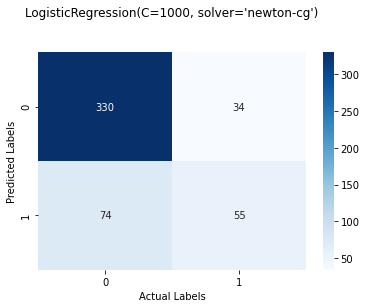

In [173]:
conf_matrix(LogisticRegression(C = 1000, solver='newton-cg', penalty = 'l2'),Coders_all_features[13], Coders_all_features_test[13], y_train, y_test)

In [ ]:
params={'classifier': 'LR', 'solvers': 'newton-cg', 'penalty': 'l2', 'c_values': 46.24353548834621}, distri

## SVC

In [71]:
model = SVC()
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = [50, 10, 1.0, 0.1, 0.01]
gamma = ['scale', 'auto']
grid = dict(kernel=kernel,C=C,gamma=gamma)

In [72]:
Paramters_all_features_SVC= []

for i in range(len(Coders_all_features)):
    

    Paramters_all_features_SVC.append(cross_val(RandomizedSearchCV,Coders_all_features[i], y_train, SVC()))
    

Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.6s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.3s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    3.8s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    3.1s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.0s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.7s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.6s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  35 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    2.0s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.4s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   10.7s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.9s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    9.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.7s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.0s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.2s finished


In [73]:
Paramters_all_features_SVC

[SVC(gamma='auto', kernel='linear'),
 SVC(C=10, gamma='auto', kernel='linear'),
 SVC(gamma='auto', kernel='sigmoid'),
 SVC(C=50),
 SVC(C=0.1, kernel='sigmoid'),
 SVC(gamma='auto', kernel='linear'),
 SVC(gamma='auto', kernel='linear'),
 SVC(gamma='auto', kernel='linear'),
 SVC(gamma='auto'),
 SVC(C=0.01, gamma='auto', kernel='linear'),
 SVC(gamma='auto', kernel='sigmoid'),
 SVC(C=50, gamma='auto', kernel='linear'),
 SVC(kernel='poly'),
 SVC(C=0.01, gamma='auto', kernel='linear')]

In [107]:
encodername_all_svc, scorevalue_all_svc = output_score(Paramters_all_features_SVC, Coders_all_features, y_train, SVC())

100%|██████████| 14/14 [00:14<00:00,  1.04s/it]


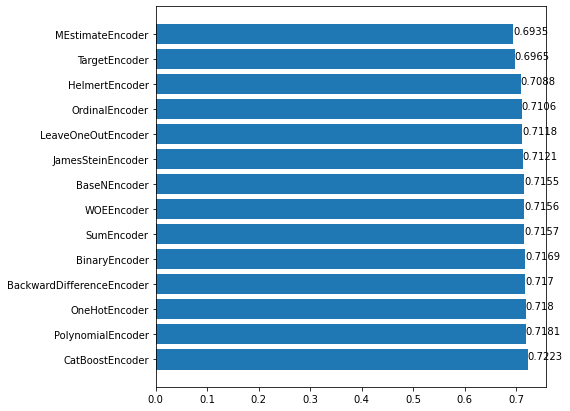

In [108]:
ploting(scorevalue_all_svc,encodername_all_svc )

In [ ]:
Paramters_selected_features_SVC= []

for i in range(len(Coders_selected_features)):
    

    Paramters_selected_features_SVC.append(cross_val(RandomizedSearchCV,Coders_selected_features[i], y_train, SVC()))
    

In [ ]:
Paramters_selected_features_SVC

In [ ]:
encodername_selected_svc, scorevalue_selected_svc = output_score(Paramters_selected_features_SVC, Coders_selected_features, y_train, SVC())
ploting(scorevalue_selected_svc,encodername_selected_svc )

In [ ]:
conf_matrix(SVC(C=50, kernel='rbf'), Coders_all_features_test[7], y_test )

In [ ]:
conf_matrix(SVC(kernel = 'rbf', C = 47, gamma = 'scale'),Coders_all_features[12], Coders_all_features_test[12], y_train, y_test)

In [ ]:
conf_matrix(SVC(kernel = 'linear', C = 1, gamma = 'auto'),Coders_all_features[12], Coders_all_features_test[12], y_train, y_test)

In [ ]:
'classifier': 'LR', 'kernel': 'linear', 'C': 27.97644182041723, 'gamma': 'auto'

## Random Forest

In [76]:
model = RandomForestClassifier()
n_estimators = [10, 100, 500,1000]
max_features = ['sqrt', 'log2', 'auto']
criterion = ['gini', 'entropy']

grid = dict(n_estimators=n_estimators,max_features=max_features, criterion = criterion)

In [77]:
Paramters_all_features_RF = []

for i in range(len(Coders_all_features)):
    

    Paramters_all_features_RF.append(cross_val(RandomizedSearchCV,Coders_all_features[i], y_train, RandomForestClassifier()))

Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.7s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   19.2s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   35.9s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   11.1s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   24.7s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   20.4s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   30.4s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   25.7s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  36 tasks      | elapsed:   10.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   20.9s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   35.3s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    7.6s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   12.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   23.7s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   27.6s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   33.8s finished


In [78]:
Paramters_all_features_RF

[RandomForestClassifier(criterion='entropy', max_features='sqrt'),
 RandomForestClassifier(criterion='entropy', n_estimators=1000),
 RandomForestClassifier(criterion='entropy', n_estimators=500),
 RandomForestClassifier(criterion='entropy', max_features='log2',
                        n_estimators=500),
 RandomForestClassifier(criterion='entropy', n_estimators=500),
 RandomForestClassifier(criterion='entropy', max_features='log2',
                        n_estimators=1000),
 RandomForestClassifier(max_features='sqrt', n_estimators=1000),
 RandomForestClassifier(n_estimators=1000),
 RandomForestClassifier(n_estimators=500),
 RandomForestClassifier(n_estimators=1000),
 RandomForestClassifier(max_features='sqrt', n_estimators=500),
 RandomForestClassifier(criterion='entropy', n_estimators=1000),
 RandomForestClassifier(max_features='log2', n_estimators=1000),
 RandomForestClassifier(n_estimators=1000)]

100%|██████████| 14/14 [01:19<00:00,  5.71s/it]


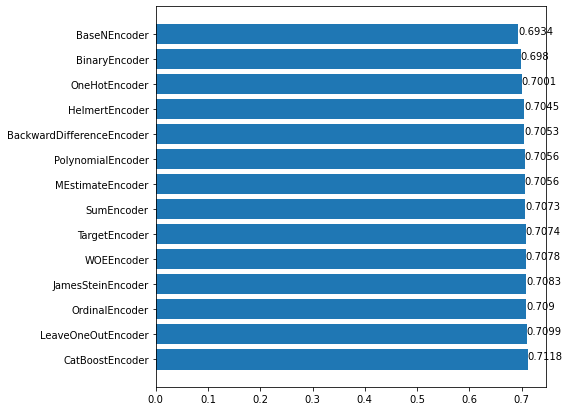

In [109]:
encodername_all_rf, scorevalue_all_rf = output_score(Paramters_all_features_RF, Coders_all_features, y_train, RandomForestClassifier())
ploting(scorevalue_all_rf,encodername_all_rf )

In [ ]:
Paramters_selected_features_RF = []

for i in range(len(Coders_selected_features)):
    

    Paramters_selected_features_RF.append(cross_val(RandomizedSearchCV,Coders_selected_features[i], y_train, RandomForestClassifier()))

In [ ]:
Paramters_all_features_RF

In [ ]:
encodername_selected_rf, scorevalue_selected_rf = output_score(Paramters_selected_features_RF, Coders_selected_features, y_train, RandomForestClassifier())
ploting(scorevalue_selected_rf,encodername_selected_rf )

In [ ]:
conf_matrix(RandomForestClassifier(max_features='sqrt', n_estimators=1000),Coders_all_features[4], Coders_all_features_test[4], y_train, y_test)

## GB Classifier

In [80]:
model = GradientBoostingClassifier()
n_estimators = [10, 100, 1000]
learning_rate = [0.001, 0.01, 0.1]
subsample = [0.5, 0.7, 1.0]
max_depth = [3, 7, 9]
grid = dict(learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample, max_depth=max_depth)

In [81]:
Paramters_all_features_GB = []

for i in range(len(Coders_all_features)):
    

    Paramters_all_features_GB.append(cross_val(RandomizedSearchCV,Coders_all_features[i], y_train, GradientBoostingClassifier()))

Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   27.2s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   44.2s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   22.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   47.3s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   41.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.8min finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   38.0s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:   42.8s remaining:   10.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   49.4s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   17.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   36.7s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.3min finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   38.2s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    6.6s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    3.1s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    6.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    3.0s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   33.6s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:  1.4min finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   14.5s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.4s finished


In [82]:
Paramters_all_features_GB

[GradientBoostingClassifier(subsample=0.7),
 GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000),
 GradientBoostingClassifier(max_depth=7),
 GradientBoostingClassifier(learning_rate=0.01, max_depth=9, n_estimators=1000),
 GradientBoostingClassifier(),
 GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=1000),
 GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000),
 GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=1000),
 GradientBoostingClassifier(subsample=0.7),
 GradientBoostingClassifier(max_depth=9, n_estimators=10, subsample=0.7),
 GradientBoostingClassifier(max_depth=7, n_estimators=10),
 GradientBoostingClassifier(learning_rate=0.01, max_depth=7, n_estimators=1000,
                            subsample=0.5),
 GradientBoostingClassifier(subsample=0.7),
 GradientBoostingClassifier()]

100%|██████████| 14/14 [02:08<00:00,  9.18s/it]


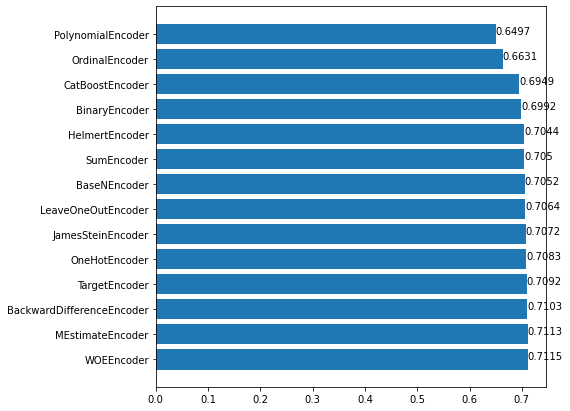

In [110]:
encodername_all_gb, scorevalue_all_gb = output_score(Paramters_all_features_GB, Coders_all_features, y_train, GradientBoostingClassifier())
ploting(scorevalue_all_gb,encodername_all_gb )

In [198]:
df_test = impute_data(df_test)

In [ ]:
conf_matrix(GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000, max_depth = 9),Coders_all_features[7], Coders_all_features_test[7], y_train, y_test)

In [ ]:
Coders_all_features_testset = []

for enco in encoder_list:
    Coders_all_features_testset.append(encoder_scalar_test(enco,StandardScaler(), cols_set1, extra_cols,cols_num, X_train, y_train, df_test))
   

In [184]:
def model_final(model, x_train, y_train, x_test):
    model_final = model
    model_final.fit(x_train, y_train)
    index_final = x_test['Index']
    ynew = model_final.predict(x_test)
    df_final = pd.DataFrame(ynew, columns = ['Churn'], index = index_final)
    df_final.index.name = 'Index'
    df_final.to_csv('kaggle_final' + str(model) +'.csv', index=True)
    

In [212]:
df_test.columns

Index(['Index', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
model_final(GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000), Coders_all_features[0], y_train, Coders_all_features_testset[0])

In [1]:
#model_final(KNeighborsClassifier(weights = 'uniform', algorithm='kd_tree', metric='manhattan', n_neighbors=55), Coders_all_features[13], y_train, Coders_all_features_testset[13])

In [ ]:
model_final(LogisticRegression(C=1000, penalty='l1', solver='liblinear'), Coders_all_features[12], y_train, Coders_all_features_testset[12])

In [ ]:
model_final(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=0,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=1,
               min_child_weight=1,
               monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
               n_estimators=150, n_jobs=0, num_parallel_tree=1,
               predictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1.0,
               tree_method='gpu_hist', validate_parameters=1, verbosity=None),Coders_all_features[7], y_train, Coders_all_features_testset[7])

In [ ]:
model_final(AdaBoostClassifier(learning_rate=0.5), Coders_all_features[7], y_train, Coders_all_features_testset[7])

## XG Boost Classifier

In [117]:
model = XGBClassifier()#tree_method='gpu_hist', predictor='gpu_predictor')
max_depth = range(1, 11, 2)
n_estimators = [50, 100, 150, 200, 500]
learning_rate = [0.1, 0.01,0.001,0.0001,0.00001]

subsample = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
colsample_bytree = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0]
grid = dict(max_depth=max_depth, n_estimators=n_estimators, learning_rate=learning_rate, subsample = subsample, colsample_bytree = colsample_bytree)

In [119]:
Paramters_all_features_XGB = []

for i in range(len(Coders_all_features)):
    

    Paramters_all_features_XGB.append(cross_val(RandomizedSearchCV,Coders_all_features[i], y_train, XGBClassifier()))

Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   12.7s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   10.3s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.0s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    3.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    3.9s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    7.9s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.9s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.3s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   15.2s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.8s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    2.9s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.6s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:   13.4s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    6.3s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    3.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    1.8s remaining:    0.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.1s finished


In [120]:
Paramters_all_features_XGB

[XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.01, max_delta_step=0, max_depth=7,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=500, n_jobs=0, num_parallel_tree=1, random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
               tree_method='exact', validate_parameters=1, verbosity=None),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.1, gamma=0, gpu_id=-1,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=5,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=200, n_jobs=0, num_parallel_tr

100%|██████████| 14/14 [00:09<00:00,  1.55it/s]


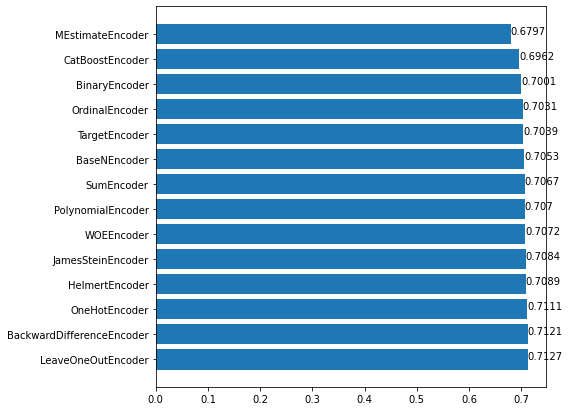

In [121]:
encodername_all_xgb, scorevalue_all_xgb = output_score(Paramters_all_features_XGB, Coders_all_features, y_train, XGBClassifier())
ploting(scorevalue_all_xgb,encodername_all_xgb )

In [ ]:
Paramters_selected_features_XGB = []

for i in range(len(Coders_selected_features)):
    

    Paramters_selected_features_XGB.append(cross_val(RandomizedSearchCV,Coders_selected_features[i], y_train, XGBClassifier(tree_method='gpu_hist', predictor='gpu_predictor')))

In [ ]:
encodername_selected_xgb, scorevalue_selected_xgb = output_score(Paramters_all_features_XGB, Coders_selected_features, y_train, XGBClassifier())
ploting(scorevalue_selected_xgb,encodername_selected_xgb )

In [ ]:
conf_matrix(XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=0,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=1,
               min_child_weight=1,
               monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
               n_estimators=150, n_jobs=0, num_parallel_tree=1,
               predictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1.0,
               tree_method='gpu_hist', validate_parameters=1, verbosity=None),Coders_all_features[7], Coders_all_features_test[7], y_train, y_test)

In [175]:
x = PrettyTable()
x.field_names = ['Best Encoder', 'Model', 'CV Score']
x.add_row(["WOOE",'KNN',  0.724])
x.add_row(["LOOE",'Logistic Regression',  0.726])
x.add_row(["CATBoost",'SVC',  0.722])
x.add_row(["CATBoost",'RF',  0.711])
x.add_row(["WOOE",'GB Classifier',  0.711])
x.add_row(["LOOE",'XGB Classifier',  0.7127])


In [176]:
x.add_row(["Polynomial",'Adaboost',  0.719])
x.add_row(["WOOE",'Stacking Classifier',  0.711])
x.remove_row(["WOOE",'Neural Network', 0.783])

In [180]:
x.del_row(8)

In [181]:
print(x)

+--------------+---------------------+----------+
| Best Encoder |        Model        | CV Score |
+--------------+---------------------+----------+
|     WOOE     |         KNN         |  0.724   |
|     LOOE     | Logistic Regression |  0.726   |
|   CATBoost   |         SVC         |  0.722   |
|   CATBoost   |          RF         |  0.711   |
|     WOOE     |    GB Classifier    |  0.711   |
|     LOOE     |    XGB Classifier   |  0.7127  |
|  Polynomial  |       Adaboost      |  0.719   |
|     WOOE     | Stacking Classifier |  0.711   |
+--------------+---------------------+----------+


## AdaBoost

In [88]:
model = AdaBoostClassifier()

n_estimators = [50, 100, 150, 200]
learning_rate = [1.0,0.5,0.1, 0.01,0.001,0.0001,0.00001]

grid = dict(n_estimators=n_estimators, learning_rate=learning_rate)

In [89]:
Paramters_all_features_ada = []

for i in range(len(Coders_all_features)):
    

    Paramters_all_features_ada.append(cross_val(RandomizedSearchCV,Coders_all_features[i], y_train, AdaBoostClassifier()))

Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    3.5s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.1s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    6.9s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.3s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    2.9s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.7s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    7.2s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Done  60 out of  75 | elapsed:    2.4s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    3.4s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.9s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.3s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.2s finished


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    5.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


Fitting 15 folds for each of 5 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed:    4.6s finished


In [90]:
Paramters_all_features_ada

[AdaBoostClassifier(learning_rate=0.5),
 AdaBoostClassifier(learning_rate=0.1, n_estimators=200),
 AdaBoostClassifier(learning_rate=0.5, n_estimators=200),
 AdaBoostClassifier(learning_rate=0.5, n_estimators=200),
 AdaBoostClassifier(learning_rate=0.5),
 AdaBoostClassifier(n_estimators=200),
 AdaBoostClassifier(learning_rate=0.5, n_estimators=100),
 AdaBoostClassifier(learning_rate=0.5),
 AdaBoostClassifier(learning_rate=0.5),
 AdaBoostClassifier(learning_rate=0.5, n_estimators=150),
 AdaBoostClassifier(learning_rate=0.5, n_estimators=150),
 AdaBoostClassifier(learning_rate=0.1, n_estimators=150),
 AdaBoostClassifier(learning_rate=0.5),
 AdaBoostClassifier(learning_rate=0.5, n_estimators=100)]

100%|██████████| 14/14 [00:11<00:00,  1.21it/s]


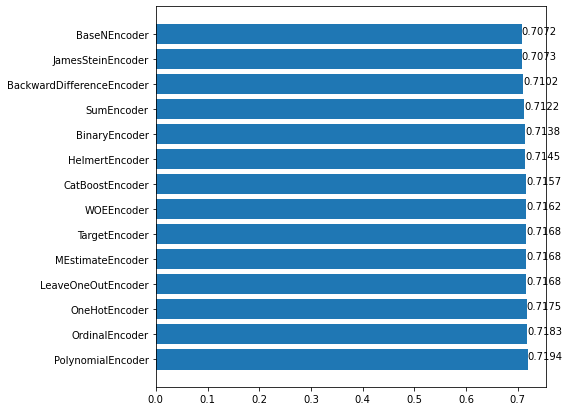

In [111]:
encodername_all_ada, scorevalue_all_ada = output_score(Paramters_all_features_ada, Coders_all_features, y_train, AdaBoostClassifier())
ploting(scorevalue_all_ada,encodername_all_ada )

In [ ]:
conf_matrix(AdaBoostClassifier(learning_rate=0.5, n_estimators=100), Coders_all_features_test[4], y_test)

In [ ]:
conf_matrix(AdaBoostClassifier(learning_rate=0.5, n_estimators=100),Coders_all_features[4], Coders_all_features_test[4], y_train, y_test)

## Stacking Classifer

### First set of estimators

In [127]:
estimator_list1 = [(AdaBoostClassifier(learning_rate=0.5)), 
 
 (XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.3, gamma=0,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=1,
               min_child_weight=1,
               
               n_estimators=150, n_jobs=0, num_parallel_tree=1,
                random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1.0,
               validate_parameters=1, verbosity=None)), 
  (LogisticRegression(C=1000, penalty='l1', solver='liblinear')),
  
  (GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000))]



In [123]:
# Meta classifiers
lr = LogisticRegression()
svc = SVC()
knn = KNeighborsClassifier()


### Second set of estimators

In [ ]:
estimator_list2 = [(AdaBoostClassifier(learning_rate=0.5)), 
 
 (XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=0,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=1,
               min_child_weight=1,
               monotone_constraints='(0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0)',
               n_estimators=150, n_jobs=0, num_parallel_tree=1,
               predictor='gpu_predictor', random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=1.0,
               tree_method='gpu_hist', validate_parameters=1, verbosity=None)), 
  (LogisticRegression(C=1000, penalty='l1', solver='liblinear')),
   (MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (100,100,2),
                            learning_rate = "adaptive", max_iter = 2000, random_state = 1000)),
  (GradientBoostingClassifier(learning_rate=0.01, n_estimators=1000))]



In [130]:
estimator_list2 = [(KNeighborsClassifier(algorithm='brute', metric='manhattan', n_neighbors=48,
                      weights='distance')), 
 
  (SVC(C=50, gamma='auto')),( MLPClassifier(activation = "relu", alpha = 0.1, hidden_layer_sizes = (100,100,2),
                            learning_rate = "adaptive", max_iter = 2000, random_state = 1000)), (XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=0,
               importance_type='gain', interaction_constraints='',
               learning_rate=0.1, max_delta_step=0, max_depth=1,
               min_child_weight=1, 
               
               n_estimators=200, n_jobs=0, num_parallel_tree=1,
                random_state=0, reg_alpha=0,
               reg_lambda=1, scale_pos_weight=1, subsample=0.4,
               validate_parameters=1, verbosity=None)), (LogisticRegression(C=1000, solver='newton-cg'))
 ]

In [128]:
sclf1 = StackingClassifier(classifiers=estimator_list1, 
                          meta_classifier=svc)

In [129]:
for i in range(len(Coders_all_features)):
    
                     

    scores = cross_val_score(sclf1, Coders_all_features[i], y_train, 
                                              cv=3, scoring='f1_macro')
    print(round(mean(scores), 3))

0.709
0.707
0.707
0.711
0.707
0.711
0.709
0.711
0.711
0.708
0.709
0.708
0.711
0.711


In [ ]:
model_final(sclf2, Coders_all_features[9], y_train, Coders_all_features_testset[9])

In [131]:
sclf2 = StackingClassifier(classifiers=estimator_list2, 
                          meta_classifier=lr)

In [132]:
for i in range(len(Coders_all_features)):
    
                     

    scores = cross_val_score(sclf2, Coders_all_features[i], y_train, 
                                              cv=3, scoring='f1_macro')
    print(round(mean(scores), 3))
    

0.71
0.708
0.708
0.718
0.703
0.717
0.707
0.718
0.718
0.71
0.707
0.705
0.718
0.726


In [ ]:
conf_matrix(sclf1,Coders_all_features[9], Coders_all_features_test[9], y_train, y_test)

## Using KNN, SVC, MLP and XGBoost with important feature gives better cv score

In [ ]:
df_test = pd.read_csv('test.csv')

In [203]:
df_test.drop(['customerID'], axis = 1, inplace = True )

In [ ]:
def model_final(model, x_train, y_train, x_test):
    model_final = model
    model_final.fit(x_train, y_train)
    index_final = x_test['Index']
    ynew = model_final.predict(x_test)
    y_new = np.where(ynew >= 0.5, 1, 0 )
    df_final = pd.DataFrame(y_new, columns = ['Churn'], index = index_final)
    df_final.index.name = 'Index'
    df_final.to_csv('kaggle_final_Neural_Net.csv', index=True)
    
    

In [207]:
df_test.columns

Index(['Index', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges'],
      dtype='object')

In [ ]:
model_final(NN, Coders_all_features[4], y_train, Coders_all_features_testset[4])

In [ ]:
from IPython.display import Image
Image('Knn_Score.JPG', width = 700, height = 300)

In [ ]:
Image('LR_Score.JPG', width = 700, height = 300)

In [ ]:
Image('Adaboost Score.JPG', width = 700, height = 300)

In [ ]:
Image('GB_Score.JPG', width = 700, height = 300)

In [ ]:
Image('XGB Score.JPG', width = 700, height = 300)

In [ ]:
Image('Stacking Classifier Score.JPG', width = 700, height = 300)

In [ ]:
Image('Neural Net Score.JPG', width = 700, height = 300)